## 1. Load up and inspect the raster dataset given. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import os 
import datetime

%matplotlib inline

In [2]:
# Import Dataset
data_dir = '/Users/katerinagiamalaki/Desktop/Statistical_test_cervest/raw_temp_data_london.nc'
DS = xr.open_mfdataset(data_dir)
DS

<xarray.Dataset>
Dimensions:    (time: 356448, latitude: 13, longitude: 13)
Coordinates:
  * latitude   (latitude) float64 53.0 52.75 52.5 52.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 -1.5 -1.25 -1.0 -0.75 ... 0.75 1.0 1.25 1.5
  * time       (time) datetime64[ns] 1979-01-01 ... 2019-09-30T23:00:00
Data variables:
    VAR_2T     (time, latitude, longitude) float32 dask.array<chunksize=(356448, 13, 13), meta=np.ndarray>
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB1 data to netCDF4.
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper05 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon May 13 19:30:10 MDT 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Fri Dec 13 11:50:00 2019: ncks -d latitude,32.0,74....
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

In [3]:
lon = DS.longitude
lat = DS.latitude
temp_london = DS.VAR_2T

In [4]:
temp_london

<xarray.DataArray 'VAR_2T' (time: 356448, latitude: 13, longitude: 13)>
dask.array<open_dataset-cdcfca4dfdfd2c99c776dc16b2dc37e0VAR_2T, shape=(356448, 13, 13), dtype=float32, chunksize=(356448, 13, 13), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float64 53.0 52.75 52.5 52.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float64 -1.5 -1.25 -1.0 -0.75 ... 0.75 1.0 1.25 1.5
  * time       (time) datetime64[ns] 1979-01-01 ... 2019-09-30T23:00:00
Attributes: (12/14)
    long_name:                     2 metre temperature
    short_name:                    2t
    units:                         K
    original_format:               WMO GRIB 1 with ECMWF local table
    ecmwf_local_table:             128
    ecmwf_parameter:               167
    ...                            ...
    grid_specification:            0.25 degree x 0.25 degree from 90N to 90S ...
    rda_dataset:                   ds633.0
    rda_dataset_url:               https:/rda.ucar.edu/datasets/ds633.0/
    rda_dataset_doi:               DOI: 10.5065/BH6N-5N20
    rda_dataset_group:             ERA5 atmospheric surface analysis [netCDF4]
    number_of_significant_digits:  7

In [5]:
# Calculate daily averages

daily_temp = temp_london.resample(time="24H").mean()

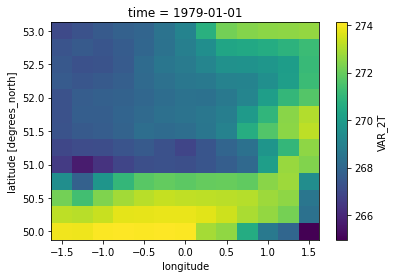

In [6]:
# Plot first time step just to check map

daily_temp.isel(time=0).plot(x="longitude")

In [7]:
# Convert to numpy array
daily_t = np.array(daily_temp)

/Users/katerinagiamalaki/opt/anaconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [8]:
# Check dims
daily_t.shape

(14883, 13, 13)

## Check for outliers and replace with NaNs

In [9]:
np.nanmax(daily_t,axis = 0) # outliers?

array([[2722.7336, 2723.3179, 2721.941 , 2721.136 , 2720.8127, 2725.0552,
        2730.1912, 2744.4304, 2756.0798, 2759.4385, 2761.8528, 2762.6628,
        2764.1277],
       [2722.9084, 2722.959 , 2720.541 , 2721.2092, 2723.4446, 2726.1238,
        2727.9297, 2731.9949, 2739.445 , 2739.1838, 2739.5745, 2741.9573,
        2746.373 ],
       [2723.6116, 2721.485 , 2720.8503, 2722.3389, 2725.306 , 2726.9814,
        2727.0857, 2729.8665, 2732.5886, 2731.6873, 2731.9248, 2733.8535,
        2745.0496],
       [2724.029 , 2722.6584, 2722.7073, 2723.509 , 2725.682 , 2726.4404,
        2726.988 , 2727.5562, 2729.4644, 2729.1072, 2732.136 , 2736.697 ,
        2748.0437],
       [2721.5688, 2724.2373, 2724.3872, 2724.947 , 2725.9602, 2726.568 ,
        2726.9172, 2727.657 , 2730.1145, 2734.0212, 2739.1902, 2746.3557,
        2753.2249],
       [2721.8   , 2725.1667, 2725.1277, 2726.9866, 2728.2195, 2728.6702,
        2729.1658, 2731.6238, 2734.6453, 2742.757 , 2749.8508, 2759.122 ,
        2765

In [10]:
np.nanmin(daily_t,axis = 0)

array([[262.28366, 262.49442, 262.40775, 262.80313, 262.8527 , 263.48468,
        264.24445, 266.78708, 268.81168, 268.89484, 268.9211 , 268.91974,
        269.00357],
       [261.734  , 261.8564 , 262.2695 , 262.132  , 262.3779 , 262.7092 ,
        262.801  , 263.0711 , 264.12018, 264.0479 , 264.41867, 265.49332,
        266.11154],
       [262.32297, 262.4028 , 261.76266, 261.52414, 261.63937, 262.61588,
        262.3029 , 262.4632 , 262.62296, 262.48566, 262.68536, 263.38092,
        265.61432],
       [262.16605, 261.7905 , 261.38815, 261.73547, 262.1056 , 263.52078,
        263.72345, 263.7656 , 263.8561 , 263.47614, 263.47037, 264.18658,
        266.3084 ],
       [261.44528, 262.24313, 262.3535 , 262.97522, 263.70715, 263.9325 ,
        264.10095, 264.892  , 265.0463 , 264.95505, 265.3986 , 266.3282 ,
        266.9213 ],
       [262.0339 , 263.0758 , 263.6724 , 263.9578 , 264.16077, 264.33084,
        264.89743, 265.07657, 265.30197, 265.9777 , 266.7184 , 268.07257,
        268.

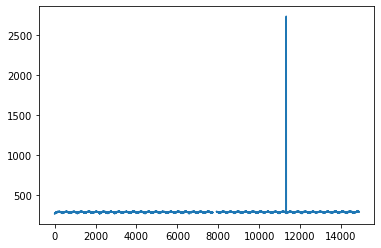

In [11]:
plt.plot(daily_t[:,12,12])

In [12]:
# Detect days with outliers 
thres_out = 313.15 # Considering that max reported temperature in London is ~40 deg Celcius
idx_thres_out = np.where(daily_t > thres_out)

In [13]:
# Replace outliers with NaNs
daily_t[idx_thres_out] = np.nan

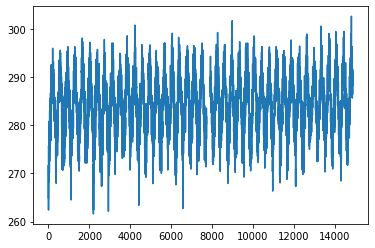

In [14]:
plt.plot(daily_t[:,12,12])

## 2. Calculate the annual longest heatwave length for each year and each grid-cell in the given raster dataset, where the annual longest heatwave length is defined to be:
## The maximum number of consecutive days in a year where the daily maximum temperature exceeds the location-specific threshold temperature T. The location-specific threshold temperature T is defined to be the 95th percentile of the distribution of all historic daily maximum temperatures for the location of interest.

In [15]:
# Define daily T95 threshold
threshold = np.nanpercentile(daily_t, 95, axis=0)
#threshold = threshold.reshape(13*13)
#threshold = np.repeat(threshold, [365], axis=0).reshape(365, 13, 13)
threshold.shape

(13, 13)

In [16]:
# Times
aa = daily_temp["time"].dt.strftime("%Y-%m-%d")
aa

<xarray.DataArray 'strftime' (time: 14883)>
array(['1979-01-01', '1979-01-02', '1979-01-03', ..., '2019-09-28',
       '2019-09-29', '2019-09-30'], dtype=object)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-09-30

In [17]:
# Make array just with years for iteration
year = aa.time.dt.year
year

<xarray.DataArray 'year' (time: 14883)>
array([1979, 1979, 1979, ..., 2019, 2019, 2019])
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2019-09-30

In [18]:
daily_t.shape

(14883, 13, 13)

In [20]:
# Define output arrays
max_l = []
years_iter = []
lat_idx = []
lon_idx = []
time_all = []
temp_all = []
all_length = []
max_length = []
t_all = []

years = list(range(1979,2020))

# Iterate through years 
for ii in years:
            
    sel_year = year == ii
    
    # Iterate through lat/lon
    for n in list(range(0,13)): 
        for k in list(range(0,13)):
            
            t0 = daily_t[sel_year,n,k]
            time = aa[sel_year]
            
            threshold[n,k]
    
            idx = t0>threshold[n,k]

            condition = idx==True
            length,count = [],0
                
            for i in range(len(condition)):
   
                if condition[i]==True:
                    count += 1
                elif condition[i]==False and count>0:
                    length.append(count)
                    count = 0
                if i==len(condition)-1 and count>0:
                    length.append(count)
                                        
            temp_temp = np.array(t0[condition])
            time_temp = time[condition==True] 
            if len(length)>0:
                max_l = max(length)
            elif len(length)==0:
                max_l = 0
            
            temp_all.append(temp_temp) # temperatures of heatwaves
            t_all.append(time_temp) # heatwave dates
            all_length.append(length) # all heatwaves duration per pixel
            max_length.append(max_l)
            years_iter.append(ii) # heatwave years
            lat_idx.append(n) # longitude 
            lon_idx.append(k) #latitude
        

In [23]:
# Gather all in a dataframe 
df_max_length_per_pixel = pd.DataFrame(all_length)
df_max_length_per_pixel.insert(0,"max_len", max_length)
df_max_length_per_pixel.insert(1,"years", years_iter)
df_max_length_per_pixel.insert(2,"lat", lat_idx)
df_max_length_per_pixel.insert(3,"lon", lon_idx)

df_max_length_per_pixel

,max_len,years,lat,lon,0,1,2,3,4,5,...,7,8,9,10,11,12,13,14,15,16
0,5,1979,0,0,2.0,1.0,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1979,0,1,2.0,1.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1979,0,2,2.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1979,0,3,2.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1979,0,4,1.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,6,2019,12,8,1.0,2.0,1.0,5.0,2.0,5.0,...,2.0,6.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
6925,5,2019,12,9,1.0,3.0,1.0,5.0,2.0,4.0,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6926,5,2019,12,10,1.0,1.0,3.0,2.0,5.0,2.0,...,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6927,7,2019,12,11,1.0,7.0,1.0,2.0,5.0,2.0,...,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_temperatures = pd.DataFrame(temp_all)
df_temperatures.insert(0,"years", years_iter)
df_temperatures.insert(1,"lat", lat_idx)
df_temperatures.insert(2,"lon", lon_idx)
df_temperatures

,years,lat,lon,0,1,2,3,4,5,6,...,51,52,53,54,55,56,57,58,59,60
0,1979,0,0,291.952057,292.079102,292.108429,290.903198,291.281311,293.256775,292.477997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979,0,1,292.008636,292.222809,292.557892,291.698151,293.603363,292.905975,291.732056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979,0,2,291.976074,292.201019,292.875854,292.006744,293.810089,293.222290,292.061310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1979,0,3,291.773102,292.079987,293.083771,292.232819,293.948517,293.525116,292.284149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1979,0,4,291.867584,293.232635,292.418854,294.015320,293.778290,292.377655,292.481964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,2019,12,8,291.196991,291.835907,293.630127,291.165192,291.174225,295.371307,293.392365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6925,2019,12,9,292.744781,291.834381,293.355927,296.125397,291.843079,292.002686,297.466919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6926,2019,12,10,292.252899,293.144501,292.337463,293.637848,296.880951,291.945465,291.828430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6927,2019,12,11,292.583069,293.480927,292.193237,292.034821,292.421417,293.020721,294.001617,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Quick fix for correct lat/lon values - fix if enough time! 

lon = DS.longitude
lon = np.array(lon)
lat = DS.latitude
lat = np.array(lat)


In [26]:
# Replace index values with actual lats and longs

for i in list(range(0,13)):
    df_max_length_per_pixel["lon"] = df_max_length_per_pixel["lon"].replace(i,lon[i])
    df_temperatures["lon"] = df_max_length_per_pixel["lon"].replace(i,lon[i])
for j in list(range(0,13)):    
    df_max_length_per_pixel["lat"] = df_max_length_per_pixel["lat"].replace(j,lat[j])
    df_temperatures["lat"] = df_max_length_per_pixel["lat"].replace(j,lat[j])

In [27]:
df_max_length_per_pixel.columns = ['max_l', 'years', 'lat','lon','hw_1', 'hw_2', 'hw_3', 'hw_4','hw_5', 'hw_6', 'hw_7', 'hw_8', 'hw_9', 'hw_10', 'hw_11', 'hw_12', 'hw_13', 'hw_14', 'hw_15', 'hw_16', 'hw_17']
df_max_length_per_pixel

,max_l,years,lat,lon,hw_1,hw_2,hw_3,hw_4,hw_5,hw_6,...,hw_8,hw_9,hw_10,hw_11,hw_12,hw_13,hw_14,hw_15,hw_16,hw_17
0,5,1979,53.0,-1.50,2.0,1.0,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1979,53.0,-1.25,2.0,1.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,1979,53.0,-1.00,2.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1979,53.0,-0.75,2.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1979,53.0,-0.50,1.0,1.0,4.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6924,6,2019,50.0,0.50,1.0,2.0,1.0,5.0,2.0,5.0,...,2.0,6.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN
6925,5,2019,50.0,0.75,1.0,3.0,1.0,5.0,2.0,4.0,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6926,5,2019,50.0,1.00,1.0,1.0,3.0,2.0,5.0,2.0,...,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6927,7,2019,50.0,1.25,1.0,7.0,1.0,2.0,5.0,2.0,...,3.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Dropping info for matrix processing 

df_length = df_max_length_per_pixel
df_length = df_length.drop('max_l', axis =1 )
df_length = df_length.drop('lon', axis =1 )
df_length = df_length.drop('years', axis =1 )
df_length = df_length.drop('lat', axis =1 )

In [29]:
df_temp = df_temperatures
df_temp = df_temp.drop('lon', axis =1 )
df_temp = df_temp.drop('years', axis =1 )
df_temp = df_temp.drop('lat', axis =1 )

In [30]:
np.savetxt("df_temp.csv", df_temp, delimiter=" , ")
np.savetxt("df_length.csv", df_length, delimiter=" , ")

# 3. Report the mean, standard deviation, and maximum of the distribution of annual longest heatwave lengths across all years and all grid-cells. 

## Extract mean, std and max temperatures for each longest heatwave

## Calculations in Matlab 


In [31]:
metrics ='/Users/katerinagiamalaki/Desktop/Statistical_test_cervest/metrics.csv'
metrics = pd.read_csv(metrics, header = None)
metrics.columns = ['mean', 'std','max']
metrics

,mean,std,max
0,291.843842,0.986867,293.256775
1,292.484886,0.933455,293.603363
2,292.775108,0.889016,293.810089
3,292.997650,0.871095,293.948517
4,293.147530,0.870746,294.015320
...,...,...,...
6924,292.727295,0.997058,293.742523
6925,295.271417,3.336552,299.475861
6926,295.792651,3.529859,300.212921
6927,293.488743,1.811990,297.268463


In [32]:
df_length_info = df_max_length_per_pixel[['max_l', 'years','lat','lon']].copy()
df_length_info

,max_l,years,lat,lon
0,5,1979,53.0,-1.50
1,4,1979,53.0,-1.25
2,4,1979,53.0,-1.00
3,4,1979,53.0,-0.75
4,4,1979,53.0,-0.50
...,...,...,...,...
6924,6,2019,50.0,0.50
6925,5,2019,50.0,0.75
6926,5,2019,50.0,1.00
6927,7,2019,50.0,1.25


## Final array with longest heatwave length (max_l), year, lat, lon, mean, standard deviation and maximum T for longest heatwaves in each pixel 

In [33]:
df = pd.concat([df_length_info.reset_index(drop=True), metrics.reset_index(drop=True)], axis=1)
df = pd.concat([df_length_info,metrics], axis=1)
df

,max_l,years,lat,lon,mean,std,max
0,5,1979,53.0,-1.50,291.843842,0.986867,293.256775
1,4,1979,53.0,-1.25,292.484886,0.933455,293.603363
2,4,1979,53.0,-1.00,292.775108,0.889016,293.810089
3,4,1979,53.0,-0.75,292.997650,0.871095,293.948517
4,4,1979,53.0,-0.50,293.147530,0.870746,294.015320
...,...,...,...,...,...,...,...
6924,6,2019,50.0,0.50,292.727295,0.997058,293.742523
6925,5,2019,50.0,0.75,295.271417,3.336552,299.475861
6926,5,2019,50.0,1.00,295.792651,3.529859,300.212921
6927,7,2019,50.0,1.25,293.488743,1.811990,297.268463


In [36]:
np.savetxt("df.csv", df, delimiter=" , ")

## 4. Describe, and if possible implement, a procedure to test whether there is a statistically significant upward trend in the length of heatwaves in **any** of the grid-cells.

In [46]:
# Calculate length of heatwaves per pixel throughout the whole time series 

# Define output arrays
max_l = []
years_iter = []
lat_idx = []
lon_idx = []
time_all = []
temp_all = []
all_length = []
max_length = []
t_all = []


    
# Iterate through lat/lon
for n in list(range(0,13)): 
    for k in list(range(0,13)):
            
        t0 = daily_t[:,n,k]
        #time = aa[sel_year]
            
        threshold[n,k]
    
        idx = t0>threshold[n,k]

        condition = idx==True
        length,count = [],0
                
        for i in range(len(condition)):
   
            if condition[i]==True:
                count += 1
            elif condition[i]==False and count>0:
                length.append(count)
                count = 0
            if i==len(condition)-1 and count>0:
                length.append(count)
                                        
        temp_temp = np.array(t0[condition])
        #time_temp = time[condition==True] 
        if len(length)>0:
            max_l = max(length)
        elif len(length)==0:
            max_l = 0
            
        temp_all.append(temp_temp) # temperatures of heatwaves
        t_all.append(time_temp) # heatwave dates
        all_length.append(length) # all heatwaves duration per pixel
        max_length.append(max_l)
       # years_iter.append(ii) # heatwave years
        lat_idx.append(n) # longitude 
        lon_idx.append(k) #latitude
        

In [61]:
# Gather all in a dataframe (excluding year)
max_length_per_pixel = pd.DataFrame(all_length)
max_length_per_pixel.insert(0,"max_len", max_length)
max_length_per_pixel.insert(1,"lat", lat_idx)
max_length_per_pixel.insert(2,"lon", lon_idx)

max_length_per_pixel

,max_len,lat,lon,0,1,2,3,4,5,6,...,303,304,305,306,307,308,309,310,311,312
0,18,0,0,2,1,5,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,0,1,2,1,4,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,0,2,2,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,0,3,2,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,0,4,1,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,18,12,8,1,1,1,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,18,12,9,1,1,1,1,1,1,1,...,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,18,12,10,1,1,1,1,2,2,1,...,1.0,3.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0,NaN
167,15,12,11,1,1,1,1,1,2,3,...,1.0,7.0,1.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0


In [62]:
# Quick fix for correct lat/lon values - fix if enough time! 

lon = DS.longitude
lon = np.array(lon)
lat = DS.latitude
lat = np.array(lat)
# Replace index values with actual lats and longs

for i in list(range(0,13)):
    max_length_per_pixel["lon"] = max_length_per_pixel["lon"].replace(i,lon[i])
    #df_temperatures["lon"] = df_max_length_per_pixel["lon"].replace(i,lon[i])
for j in list(range(0,13)):    
    max_length_per_pixel["lat"] = max_length_per_pixel["lat"].replace(j,lat[j])
    #df_temperatures["lat"] = df_max_length_per_pixel["lat"].replace(j,lat[j])

In [63]:
max_length_per_pixel

,max_len,lat,lon,0,1,2,3,4,5,6,...,303,304,305,306,307,308,309,310,311,312
0,18,53.0,-1.50,2,1,5,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18,53.0,-1.25,2,1,4,1,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,53.0,-1.00,2,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18,53.0,-0.75,2,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18,53.0,-0.50,1,1,4,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,18,50.0,0.50,1,1,1,1,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,18,50.0,0.75,1,1,1,1,1,1,1,...,3.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,18,50.0,1.00,1,1,1,1,2,2,1,...,1.0,3.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0,NaN
167,15,50.0,1.25,1,1,1,1,1,2,3,...,1.0,7.0,1.0,2.0,5.0,2.0,2.0,3.0,5.0,1.0


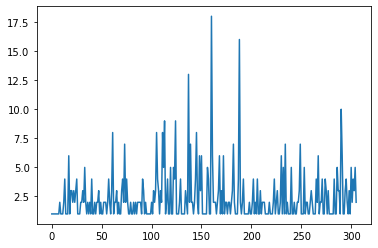

In [70]:
# Example check

plt.plot(max_length_per_pixel.iloc[165,3:312])

In [137]:
# Mann-Kendall trend test (** needs pip install pymannkendall **)

trend_temp = []
pvalue_temp = []
slope_temp = []
intercept_temp =[]
trend = []
pvalue = []
slope = []
intercept = []

for i in list(range(0,len(max_length_per_pixel))):
    mann_result = mk.original_test(max_length_per_pixel.iloc[i,3:309])
    trend_temp = mann_result[0]
    pvalue_temp = mann_result[2]
    slope_temp = mann_result[7]
    intercept_temp = mann_result[8]
    
    trend.append(trend_temp)
    pvalue.append(pvalue_temp)
    slope.append(slope_temp)
    intercept.append(intercept_temp)

In [138]:
# Gather all in a dataframe (excluding year)
mk_results = pd.DataFrame(intercept)
mk_results.insert(0,"max_len", trend)
mk_results.insert(1,"lat", pvalue)
mk_results.insert(2,"lon", slope)

mk_results.columns = ['trend', 'pvalue', 'slope','intercept']
mk_results

,trend,pvalue,slope,intercept
0,no trend,0.437935,0.0,2.0
1,no trend,0.356991,0.0,2.0
2,no trend,0.698853,0.0,2.0
3,no trend,0.774620,0.0,2.0
4,no trend,0.871946,0.0,2.0
...,...,...,...,...
164,increasing,0.023181,0.0,2.0
165,no trend,0.478831,0.0,2.0
166,no trend,0.293804,0.0,2.0
167,no trend,0.062539,0.0,2.0


In [145]:
lon_lat = max_length_per_pixel[['lat','lon']].copy()
df_trends = pd.concat([lon_lat.reset_index(drop=True), mk_results.reset_index(drop=True)], axis=1)
df_trends = pd.concat([lon_lat,mk_results], axis=1)
df_trends

,lat,lon,trend,pvalue,slope,intercept
0,53.0,-1.50,no trend,0.437935,0.0,2.0
1,53.0,-1.25,no trend,0.356991,0.0,2.0
2,53.0,-1.00,no trend,0.698853,0.0,2.0
3,53.0,-0.75,no trend,0.774620,0.0,2.0
4,53.0,-0.50,no trend,0.871946,0.0,2.0
...,...,...,...,...,...,...
164,50.0,0.50,increasing,0.023181,0.0,2.0
165,50.0,0.75,no trend,0.478831,0.0,2.0
166,50.0,1.00,no trend,0.293804,0.0,2.0
167,50.0,1.25,no trend,0.062539,0.0,2.0


In [164]:
# Find significant increasing trends 

significance_temp = []
significance = []

for i in list(range(0,169)):
    if df_trends['pvalue'].iloc[i]<=0.05:
        significance_temp = 1
    else:
        significance_temp = 0
    
    significance.append(significance_temp)

In [168]:
sum(significance)

38

In [169]:
# Percentage of pixels exhibiting a significant increasing T trend

sum(significance)/len(significance)*100

22.485207100591715